In [78]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
#The main library we use. Manipulates Excel-like tables (called dataframes) with named rows and columns
import pandas as pd 
import numpy as np

In [80]:
#ploting capacities
import matplotlib.pyplot as plt 
#make plots appear in this notebook
%matplotlib inline  

#Default options for plots: this controls the font used in figures
font = {'family' : 'sans serif',
    'size'   : 18}
plt.rc('font', **font)

from res_ind_lib import *     #MAIN library: the functions used to compute risk, resilience, etc

# Helper functions

In [81]:
def spine_and_ticks(ax):
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color("none")

    #removes ticks 
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')


In [82]:
#Default options for plots: this controls the font used in figures
font = {'family' : 'sans serif',
    'size'   : 16}
plt.rc('font', **font)


## Get the Data

In [83]:
df = pd.read_csv("results/all_data_and_results.csv", 
                 index_col=0, skiprows=[0,2]).dropna()

df_perc=df.assign(pov_head=100*df.pov_head,
             resilience=100*df.resilience, risk_to_assets= 100*df.risk_to_assets,
            risk= 100*df.risk)
df.head()

,pop,cp,cr,pov_head,gdp_pc_pp,gdp_pc_pp_nat,social_p,social_r,v_p,v_r,...,dK,delta_W,dcap,dcar,dKtot,dWpc_curency,dWtot_currency,risk,resilience,risk_to_assets
variable,,,,,,,,,,,,,,,,,,,,,
Ha Noi,6698811,601.835765,5268.983750,0.059952,4989.178711,3692.174852,0.132861,0.132861,0.033333,0.033333,...,223.782876,0.000010,56.827762,494.235505,1.915541e+08,38.347225,2.568808e+08,0.007686,0.745692,0.005731
Ha Giang,774681,245.646228,5193.757053,0.638095,2036.390991,3692.174852,0.108244,0.108244,0.072512,0.033333,...,32.944633,0.000022,50.644214,495.329291,3.858832e+06,27.687183,2.144873e+07,0.013596,0.179910,0.002446
Cao Bang,540048,247.407868,4246.666248,0.549020,2050.994873,3692.174852,0.130566,0.130566,0.047619,0.033333,...,38.711005,0.000016,31.933323,384.958195,2.740239e+06,17.695338,9.556332e+06,0.008628,0.286746,0.002474
Bac Kan,311681,267.005596,6671.464083,0.696078,2213.458740,3692.174852,0.065313,0.065313,0.036150,0.033333,...,32.310035,0.000013,27.774917,638.061457,1.286810e+06,15.520882,4.837564e+06,0.007012,0.266004,0.001865
Tuyen Quang,772231,307.017677,4314.007739,0.441441,2545.156250,3692.174852,0.074788,0.074788,0.111589,0.033333,...,64.893633,0.000031,97.402516,413.406919,6.893959e+06,49.337004,3.809956e+07,0.019385,0.180946,0.003508


## Map the data

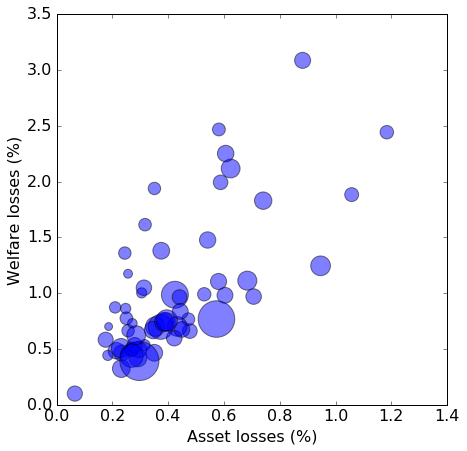

In [84]:
x="risk_to_assets"
y="risk"
s=df["pop"]/5e3
ax =df_perc.plot.scatter(x=x,y=y,s=s, alpha=0.5, figsize=(7,7))
plt.xlabel("Asset losses (%)")
plt.ylabel("Welfare losses (%)")
plt.ylim(0);
plt.xlim(0);
plt.savefig("img/asset_vs_welfare_losses.png")

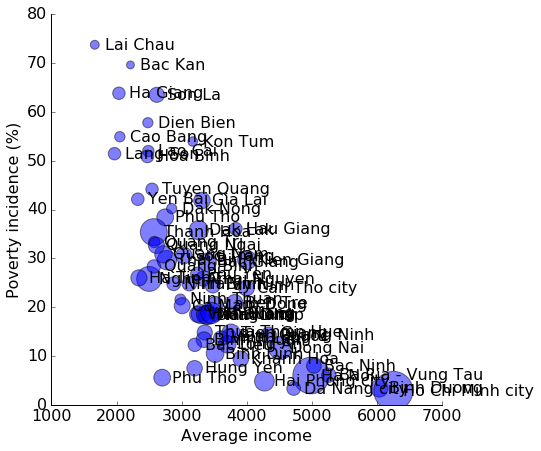

In [85]:
x="gdp_pc_pp"
y="pov_head"
s=df["pop"]/5e3
ax =df_perc.plot.scatter(x=x,y=y,s=s, alpha=0.5, figsize=(7,7))
plt.xlabel("Average income")
plt.ylabel("Poverty incidence (%)")
plt.ylim(0);

for label, x, y in zip(df.index,df_perc[x],df_perc[y]):
            plt.annotate(
                label, 
                xy = (x, y), xytext = (10, 0),
                textcoords = 'offset points', ha = 'left', va = 'center',
                #bbox = nonedict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
            )


spine_and_ticks(ax)

plt.savefig("img/poverty_vs_income.png")

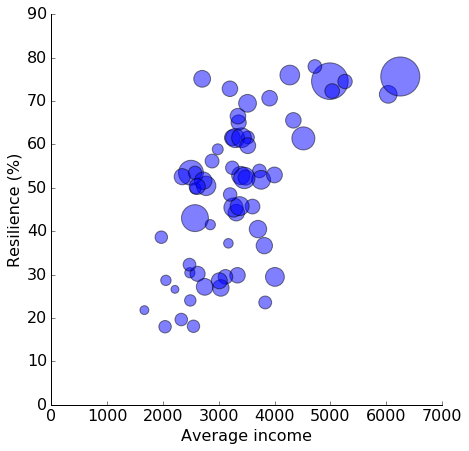

In [86]:
ax=df_perc.plot.scatter(x="gdp_pc_pp", y="resilience", s=df["pop"]/5e3, alpha=0.5, figsize=(7,7))
plt.xlabel("Average income")
plt.ylabel("Resilience (%)")
plt.ylim(0);
plt.xlim(0);

spine_and_ticks(ax)

plt.savefig("img/capacity_vs_poverty.png")

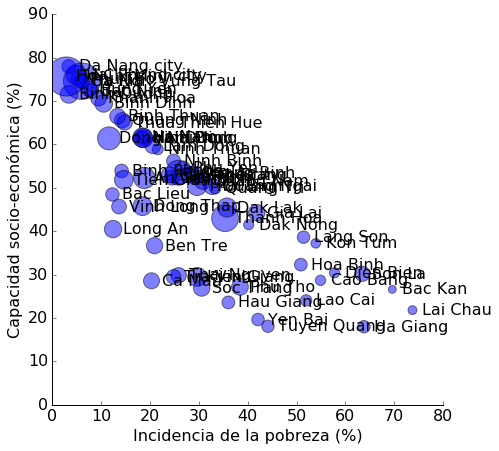

In [87]:

ax=df_perc.plot.scatter(x="pov_head", y="resilience", s=df["pop"]/5e3, alpha=0.5, figsize=(7,7))
plt.xlabel("Incidencia de la pobreza (%)")
plt.ylabel("Capacidad socio-económica (%)")
plt.ylim(0);
plt.xlim(0);

spine_and_ticks(ax)

for label, x, y in zip(df_perc.index,df_perc.pov_head, df_perc.resilience):
            plt.annotate(
                label, 
                xy = (x, y), xytext = (10, 0),
                textcoords = 'offset points', ha = 'left', va = 'center',
                #bbox = nonedict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
            )

plt.savefig("img/capacity_vs_poverty.png")

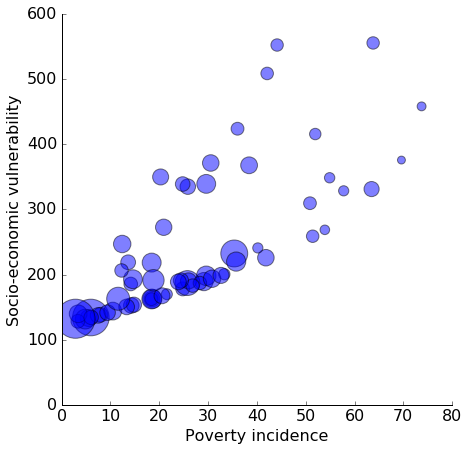

In [88]:
ax =df_perc.assign(vu=100/df.resilience).plot.scatter(x="pov_head", y="vu", s=df["pop"]/5e3, alpha=0.5, figsize=(7,7))
plt.xlabel("Poverty incidence")
plt.ylabel("Socio-economic vulnerability")
plt.ylim(0);
plt.xlim(0);

spine_and_ticks(ax)



plt.savefig("img/se_vuln_vs_poverty.png")

## Bars

In [89]:
from autolabel import autolabel

In [90]:
output_colors = dict(risk_to_assets="#9ecae1", resilience="#fcbba1", risk = "#9e9ac8")

In [91]:
def plot_barh(a,color="#9ecae1", xlabel=""):
    #params 
    n=len(a)
    height=.38
    pos=np.arange(n)

    #new fig
    fig, ax = plt.subplots(figsize=(5,n/1.75))
    rects=plt.barh(pos-height/2,(100*a), height=height, color=color, clip_on=False);

    #Department labels
    ax.set_yticks(pos)
    ax.set_yticklabels(a.index)

    #X axis
    ax.xaxis.set_ticklabels([])
    ax.set_xlabel(xlabel);

    #X labels
    autolabel(ax,rects,"gray",2)

    #no spines
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color("none")

    #no ticks
    for tic in ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
    plt.tight_layout()
    return ax

Socio-economic capacity averages 0 across our sample, ranging from 0 to 1


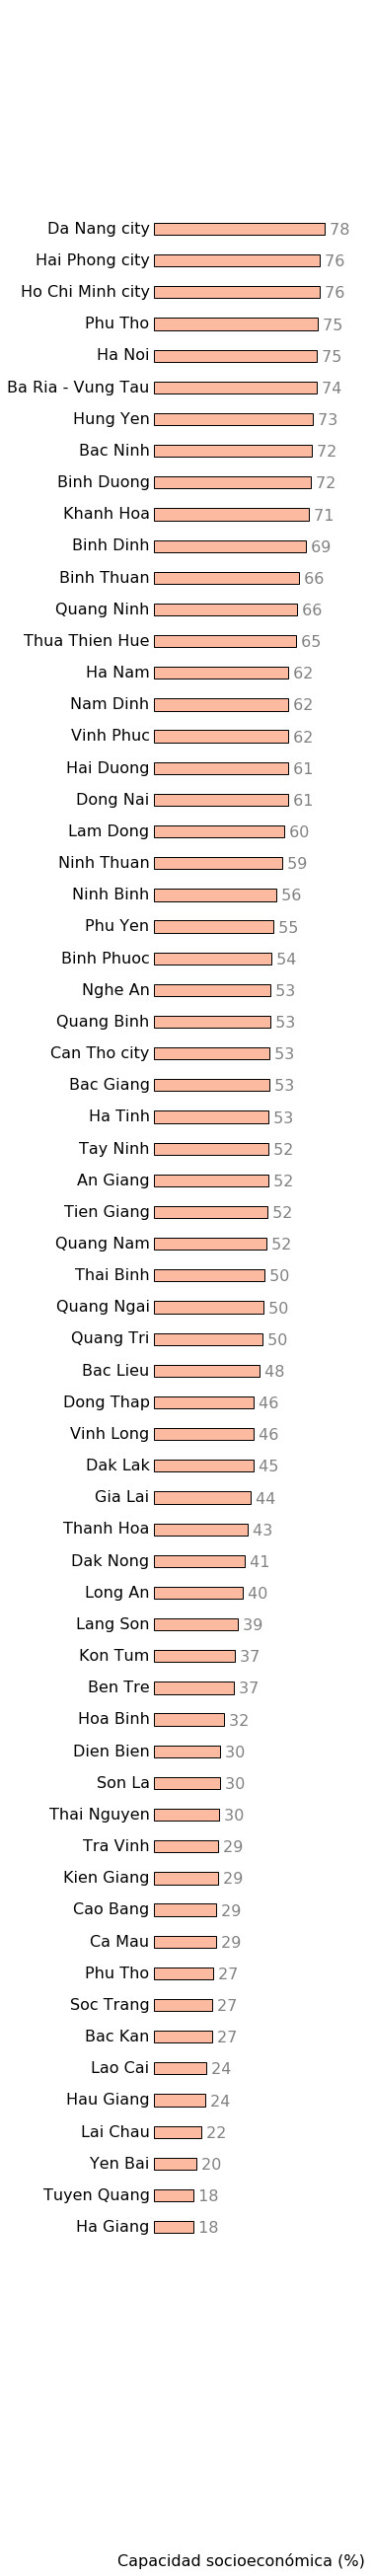

In [92]:
a=df["resilience"].sort_values(ascending=True);
a.min()*100,a.mean()*100,a.max()*100
print("Socio-economic capacity averages {mean:.0f} across our sample, ranging from {min:.0f} to {max:.0f}".format(
    min=a.min(),mean=a.mean(),max=a.max()))

ax=plot_barh(a,color="#fcbba1", xlabel='Capacidad socioeconómica (%)');
plt.savefig("img/socio-economic-capa_ranked",  bbox_inches="tight")

In [95]:
df.ix["Quang Ninh"]

pop               1.206649e+06
cp                5.229687e+02
cr                4.970777e+03
pov_head          1.428571e-01
gdp_pc_pp         4.335376e+03
gdp_pc_pp_nat     3.692175e+03
social_p          1.372982e-01
social_r          1.372982e-01
v_p               3.333333e-02
v_r               3.333333e-02
shewp             8.571429e-01
shewr             8.571429e-01
fap               2.872554e-01
far               2.574119e-01
protection        0.000000e+00
avg_prod_k        2.697000e-01
T_rebuild_K       3.000000e+00
pi                2.000000e-01
sigma_r           0.000000e+00
sigma_p           0.000000e+00
income_elast      1.500000e+00
rho               5.000000e-02
v_s               2.761905e-02
protectionref     0.000000e+00
dK                1.145117e+02
delta_W           6.843040e-06
dcap              4.831456e+01
dcar              4.571404e+02
dKtot                      inf
dWpc_curency               inf
dWtot_currency             inf
risk                       inf
resilien

In [93]:
a=df["risk_to_assets"].sort_values(ascending=False);
a.min()*100,a.mean()*100,a.max()*100
print("Risk to assets averages {mean:.0%} across our sample, ranging from {min:.0%} to {max:.0%}".format(
    min=a.min(),mean=a.mean(),max=a.max()))

ax=plot_barh(a,color="#9ecae1", xlabel='Pérdidas de capital estimadas (% del ingreso departamental)');

plt.savefig("img/risk_to_assets", bbox_inches="tight")

Risk to assets averages inf% across our sample, ranging from 0% to inf%


ValueError: posx and posy should be finite values

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000000008BC2488> (for post_execute):


ValueError: posx and posy should be finite values

ValueError: posx and posy should be finite values

In [ ]:
a=df.risk.sort_values(ascending=False);
a.min()*100,a.mean()*100,a.max()*100
print("Risk to welfare averages {mean:.0%} across our sample, ranging from {min:.0%} to {max:.0%}".format(
    min=a.min(),mean=a.mean(),max=a.max()))

ax=plot_barh(a,color=output_colors["risk"], xlabel='Pérdidas de bienestar estimadas (% del ingreso departamental)');
plt.savefig("img/risk_to_welfare" ,bbox_inches="tight")

In [ ]:



to_plot = df[["risk_to_assets", "risk"]]
nb_series = len(to_plot.T)

#params 
n=len(df)
pos=np.arange(n)
height=.38

i=0

fig, ax = plt.subplots(figsize=(3.5,n/1.75))

for var in to_plot:

    a=df.sort_values("risk")[var]
    
    #new fig
    
    rects=ax.barh(pos-nb_series*height/2+i*height,(100*a), height=height, color=output_colors[var], clip_on=False);
    autolabel(ax,rects,"gray",2,size=12)
    i+=1   

#Department labels
ax.set_yticks(pos);
ax.set_yticklabels(a.index);

#X axis
ax.xaxis.set_ticklabels([])
ax.set_xlabel("");

#no spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color("none")

#no ticks
for tic in ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False

plt.legend(["Pérdidas de activos estimadas (% del ingreso departamental)","Pérdidas de bienestar estimadas (% del ingreso departamental)"], prop= dict(size=14), bbox_to_anchor=(1.5, -0), frameon=False)

plt.savefig("img/asset_vs_welfare_losses_bar",bbox_inches="tight")

In [ ]:
df.plot.scatter(x="risk", y="risk_to_assets", )

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(x=100*df.risk_to_assets, y=100*df.risk, s=400*df.resilience**2, alpha=0.5, clip_on=False)
plt.xlim(0)
plt.ylim(0)


In [ ]:
df.columns